# Sentiment Analysis (News and Twitter Data)
# Realtime data will be analyzed (After running the code at that instant news and twits will be fetched)


In [119]:
from newspaper import  Article
import newspaper
import pandas as pd
from textblob import TextBlob
from newspaper import Config
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
import spacy 
nlp = spacy.load('en_core_web_lg')
import en_core_web_sm
print("Done")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Done


# Fetching the articles

In [121]:
# Writting changes and making a function

nltk.download('punkt')

newsLinks = ['https://edition.cnn.com/','https://www.foxnews.com/','https://www.bbc.com/news','https://news.sky.com/']
config = Config()

summaryList = []
polarity = []

userAgent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.62'
config.browser_user_agent = userAgent

def getDfForNews(newsNo):
    if newsNo > 4:
        return None
    site = newspaper.build(f"{newsLinks[newsNo]}", memoize_articles=False,config=config)
    top_articles = site.article_urls()
    ar = top_articles[:35]
    for article in ar:
        articles = Article(article,language="en")
        articles.download()
        articles.parse()
        articles.nlp()
        text = articles.summary
        summaryList.append(text)
    for summary in summaryList:
        blob = TextBlob(summary)
        sentiment = blob.sentiment.polarity
        polarity.append(sentiment)

    df1 = pd.DataFrame({'Summary Text':summaryList,'Polarity':polarity})
    summaryList.clear()
    polarity.clear()
    return df1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [122]:
# fetching data for foxnews

df11 = getDfForNews(1)

index_names = df11[ df11['Summary Text'] == 'Log in to comment on videos and join in on the fun.'].index

print(index_names)

df11.drop(index_names, inplace = True)

df11.to_csv("FoxNewsWeb.csv",index = 0)

Int64Index([0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')


In [123]:
# fetching data for CNN

df12 = getDfForNews(0)

index_names = df12[ df12['Summary Text'] == ''].index

print(index_names)

df12.drop(index_names, inplace = True)

df12.to_csv('CNNWeb.csv')

df12

Int64Index([], dtype='int64')


,Summary Text,Polarity
0,How relevant is this ad to you?\nVideo player ...,0.018750
1,A man went missing from a Carnival cruise ship...,-0.100000
2,"Basel Christmas Market, SwitzerlandBasel Chris...",0.252667
3,The picturesque town of Presicce in the sunny ...,-0.054167
4,The early days of their relationship were a wh...,0.088861
5,"Founded in 1926, Asahiya sold meat products fr...",0.061000
6,The very first sailings through the Corinth Ca...,0.278571
7,"I am severely allergic to cats, vulnerable to ...",-0.007143
8,"A representative from Google explains that ""'t...",0.242727
9,(CNN) — It is now legal for women -- and men -...,0.162500


In [124]:
# fetching data for BBC news

df13 = getDfForNews(2)

index_names = df13[ df13['Summary Text'] == ''].index

print(index_names)

df13.drop(index_names, inplace = True)

df13.to_csv('BBCWEB.csv')

df13

Int64Index([16, 34], dtype='int64')


,Summary Text,Polarity
0,US intelligence says fighting has slowed down ...,0.114815
1,Fewer banks and shops but more tattoo studios ...,0.290000
2,The prince's godmother resigned after repeated...,0.106667
3,Pope breaks down in tears over Ukraine.\nVideo...,-0.155556
4,"""I am doing this as a mother for a better futu...",0.140000
5,Officials insist visitors are unlikely to be a...,0.000000
6,Meghan and Harry's Netflix series featured a n...,0.500000
7,People falling behind on bills are being bomba...,0.033333
8,Video caption: A BBC reporter finds out what t...,0.136364
9,Video caption: A BBC reporter finds out what t...,0.136364


In [125]:
# fetching data for Skynews

df14 = getDfForNews(3)

df14.to_csv("skyNewsWeb.csv") 

df14

,Summary Text,Polarity
0,Anne Sacoolas has been sentenced to eight mont...,-0.235227
1,"Anne Sacoolas, the US citizen who killed 19-ye...",-0.023133
2,'I want to get to the other side of this',-0.125000
3,England's chief pharmaceutical officer has adm...,-0.080000
4,A row has emerged over whether the Royal Famil...,0.000000
5,"Harry describes his childhood as ""filled with ...",0.193750
6,Meghan speaks of first death threat - live upd...,0.308766
7,"People should ""think carefully"" about going on...",0.062500
8,Ms Griner was detained in February when custom...,-0.166667
9,The Domestic Homicide Project revealed 62 peop...,-0.066204


# Data Visualization (Part 1)

## Web News data analysis

In [126]:
# function to fetch positive/negative values

def getValues(req,df):
    if req == 1:
        y = df[df['Polarity'] > 0] 
        return y
    elif req == -1:
        y = df[df['Polarity'] < 0] 
        return y
    else:
        return

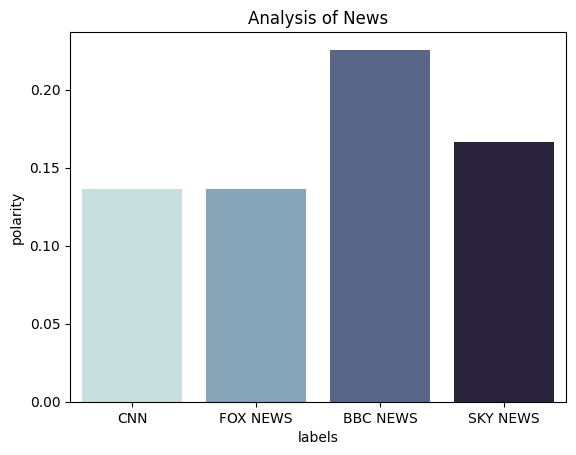

In [127]:
# TODO: Bar graph (Positive values)

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y0 = getValues(1,y0)

y1 = getValues(1,y1)

y2 = getValues(1,y2)

y3 = getValues(1,y3)

plt.title("Analysis of News")

x = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]


y = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]

pltdf = pd.DataFrame({'labels':x,'polarity':y})


sns.barplot(x=pltdf.labels,y=pltdf.polarity,palette="ch:start=.2,rot=-.3")

plt.show()

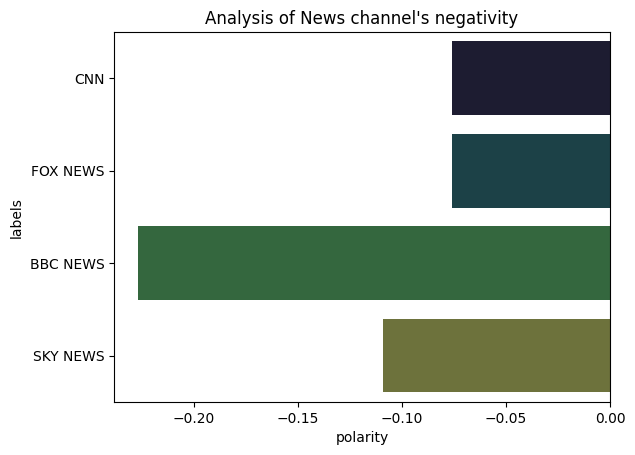

In [128]:
# TODO: Bar graph (Negative values)

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y0 = getValues(-1,y0)

y1 = getValues(-1,y1)

y2 = getValues(-1,y2)

y3 = getValues(-1,y3)

plt.title("Analysis of News channel's negativity")

x = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]


y = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]

pltdf = pd.DataFrame({'labels':x,'polarity':y})


sns.barplot(y=pltdf.labels,x=pltdf.polarity,palette=sns.color_palette("cubehelix", 8))

plt.show()

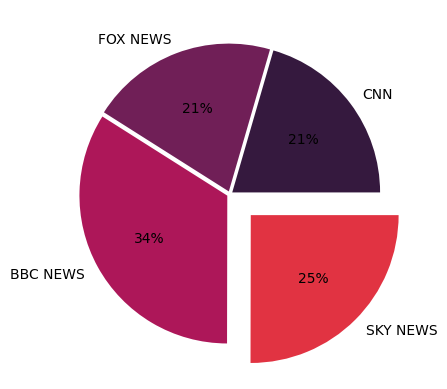

In [129]:
#  TODO: Pie Chart

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y0 = getValues(1,y0)

y1 = getValues(1,y1)

y2 = getValues(1,y2)

y3 = getValues(1,y3)

data = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]
labels = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]
explode = [0.02,0.02,0.02,0.2]
colors = sns.color_palette("rocket")
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

## Function for word analysis

In [130]:
def returnData(df):
    nlp = spacy.load('en_core_web_lg')
    allSentence = []

    # getting all the sentences
    for text in df['Summary Text']:
        allSentence.append(text)

    lines = []

    for line in allSentence:
        words = line.split()
        for w in words:
            lines.append(w)

    # removing punctutaions
    lines  = [re.sub(r'[^A-Za-z0-9]+','',x) for x in lines]

    lines2 = []

    for words in lines:
        if words != '':
            lines2.append(words)

    s_stemmer = SnowballStemmer(language='english')

    stem = []

    # stopwords removal
    for words in lines2: 
        if words not in nlp.Defaults.stop_words:
            stem.append(words)

    countingdf = pd.DataFrame(stem)

    countingdf = countingdf[0].value_counts()

    nlp = en_core_web_sm.load()

    str1 = " "
    stem2 = str1.join(lines2)
    stem2 = nlp(stem2)
    label = [(X.text,X.label_) for X in stem2.ents]
    edf1 = pd.DataFrame(label,columns=['Word','Entity'])
    edf2 = edf1.where(edf1['Entity'] == 'PERSON')
    edf3 = edf2['Word'].value_counts()

    return countingdf, edf3

In [131]:
dfFoxNewsWeb = pd.read_csv('FoxNewsWeb.csv')

dfCNNWeb = pd.read_csv('CNNWeb.csv')

dfSkyNewsWeb = pd.read_csv('skyNewsWeb.csv')

dfBBCWEB = pd.read_csv('BBCWEB.csv')

print("Done!")

Done!


In [132]:
dfFoxNewsWebWordCount,dfFoxNewsWebPersonCount  = returnData(dfFoxNewsWeb)

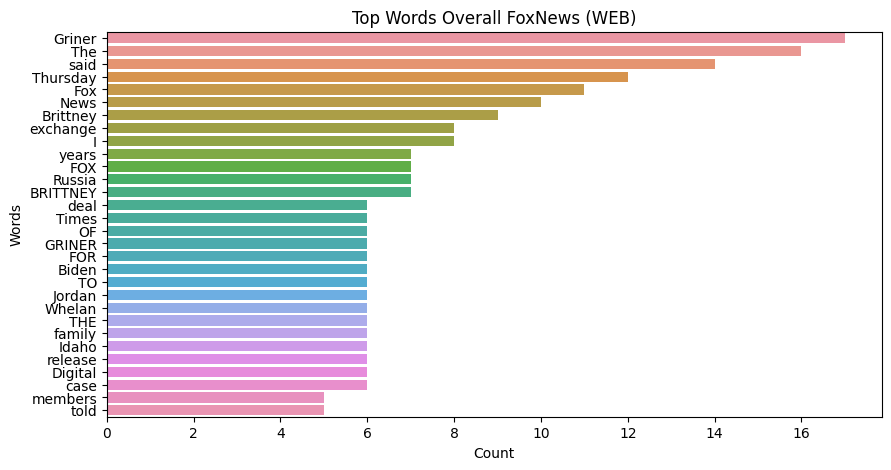

In [133]:
dfFoxNewsWebWordCount = dfFoxNewsWebWordCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfFoxNewsWebWordCount.values,y=dfFoxNewsWebWordCount.index)
plt.title('Top Words Overall FoxNews (WEB)')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

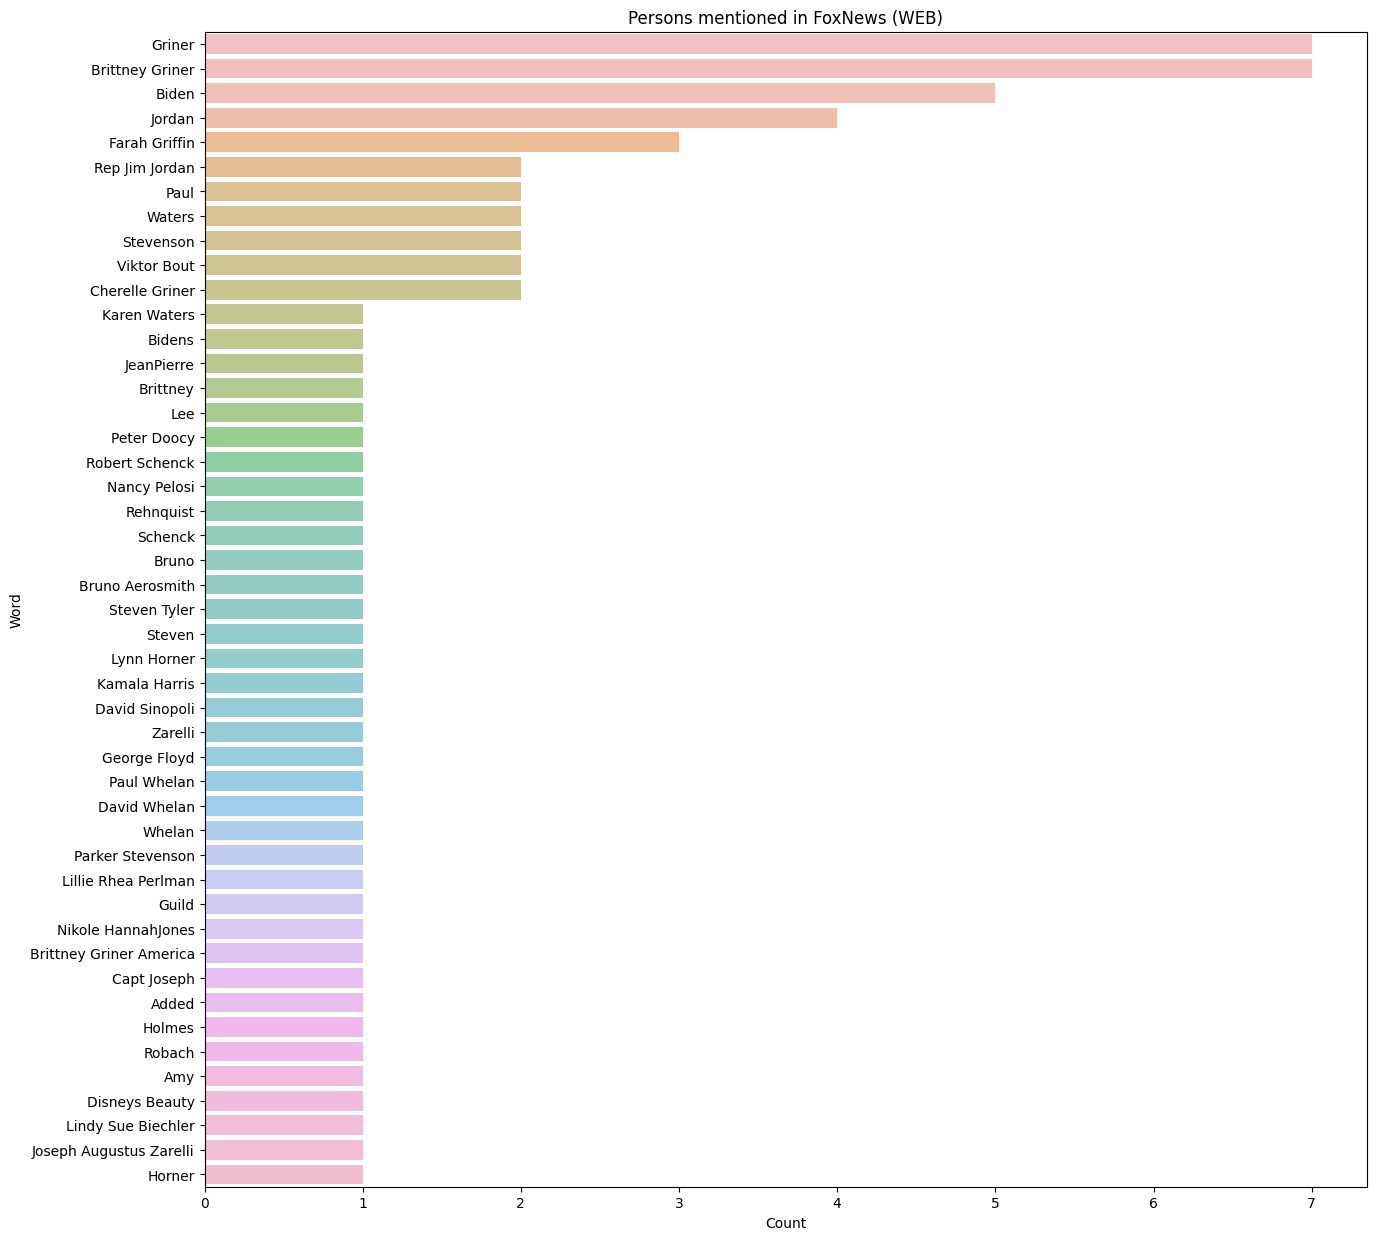

In [136]:
plt.figure(figsize=(15,15))
sns.barplot(x=dfFoxNewsWebPersonCount.values,y=dfFoxNewsWebPersonCount.index,alpha=0.6)
plt.title("Persons mentioned in FoxNews (WEB)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [137]:
dfCNNWebCount,dfCNNWebPersonCount  = returnData(dfCNNWeb)

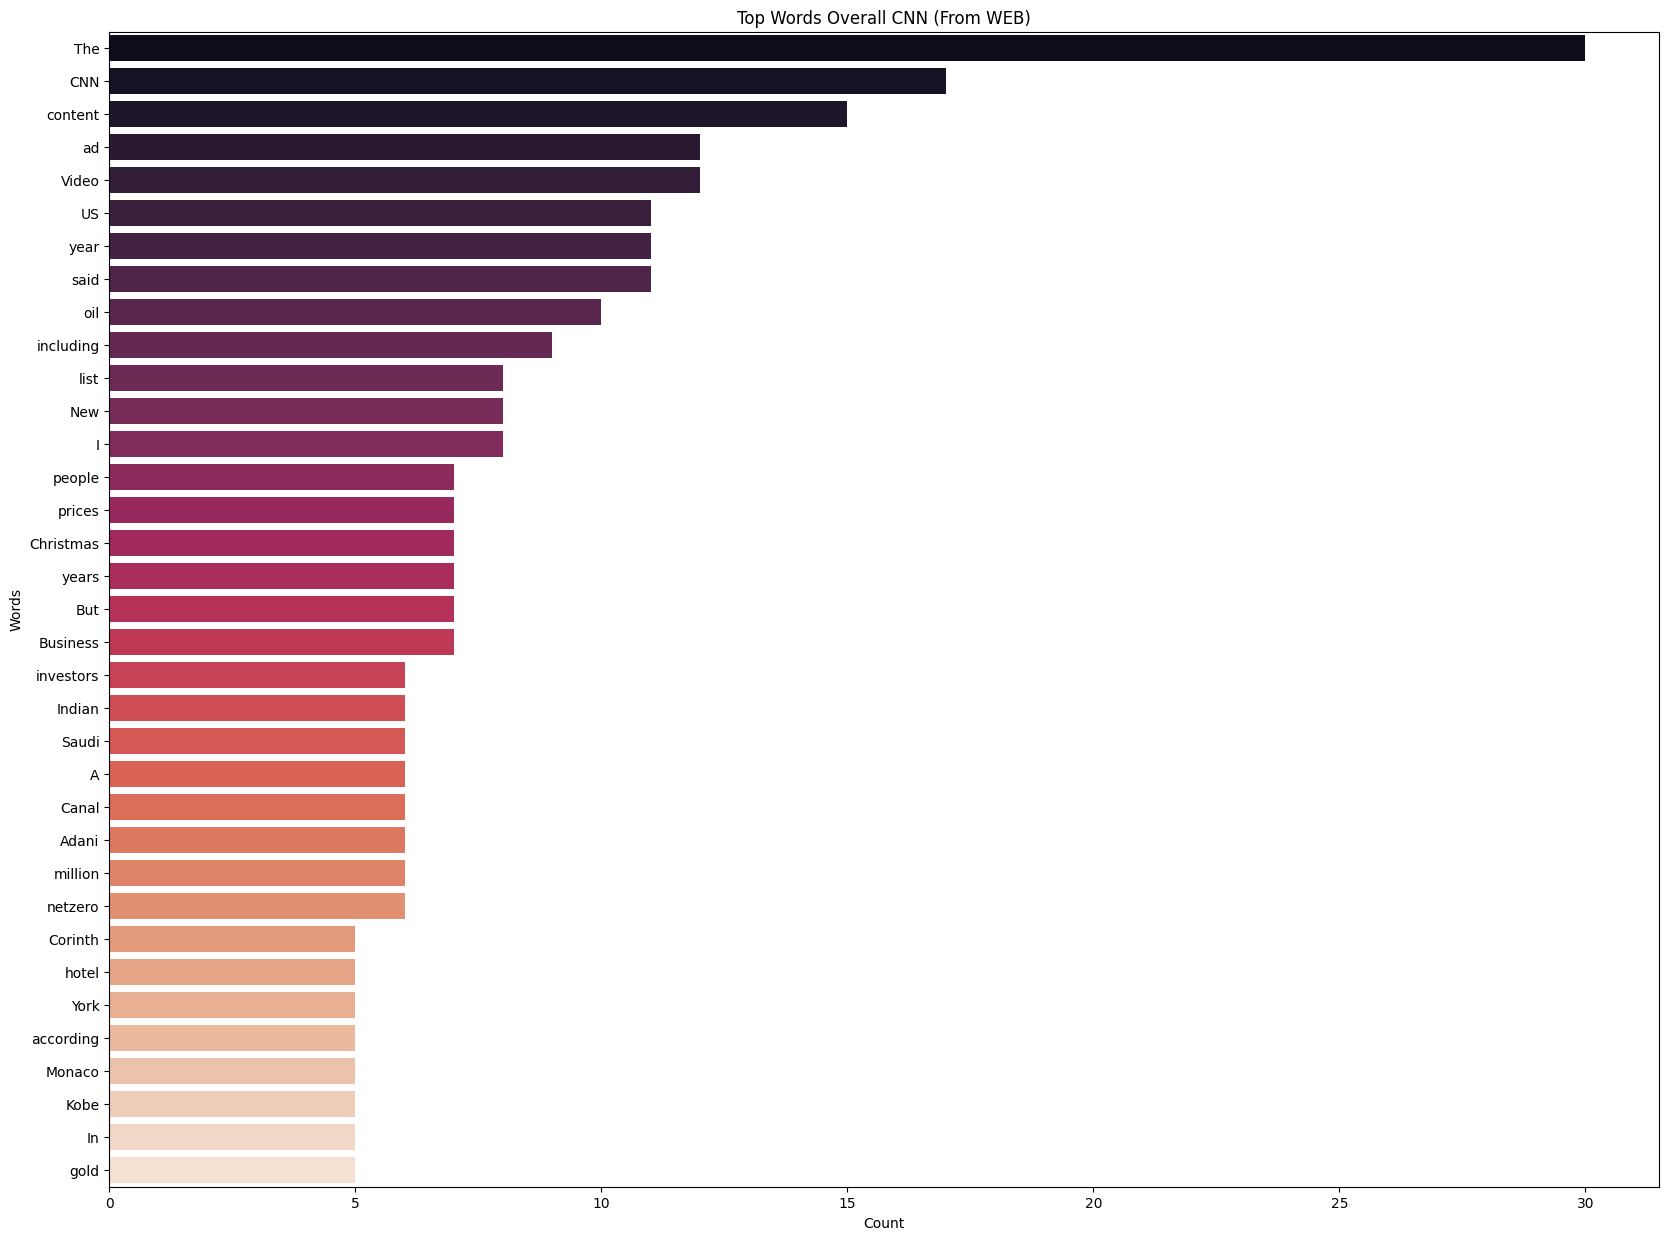

In [140]:
dfCNNWebCount = dfCNNWebCount[:35]
plt.figure(figsize=(20,15))
sns.barplot(x=dfCNNWebCount.values,y=dfCNNWebCount.index,palette="rocket")
plt.title('Top Words Overall CNN (From WEB)')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

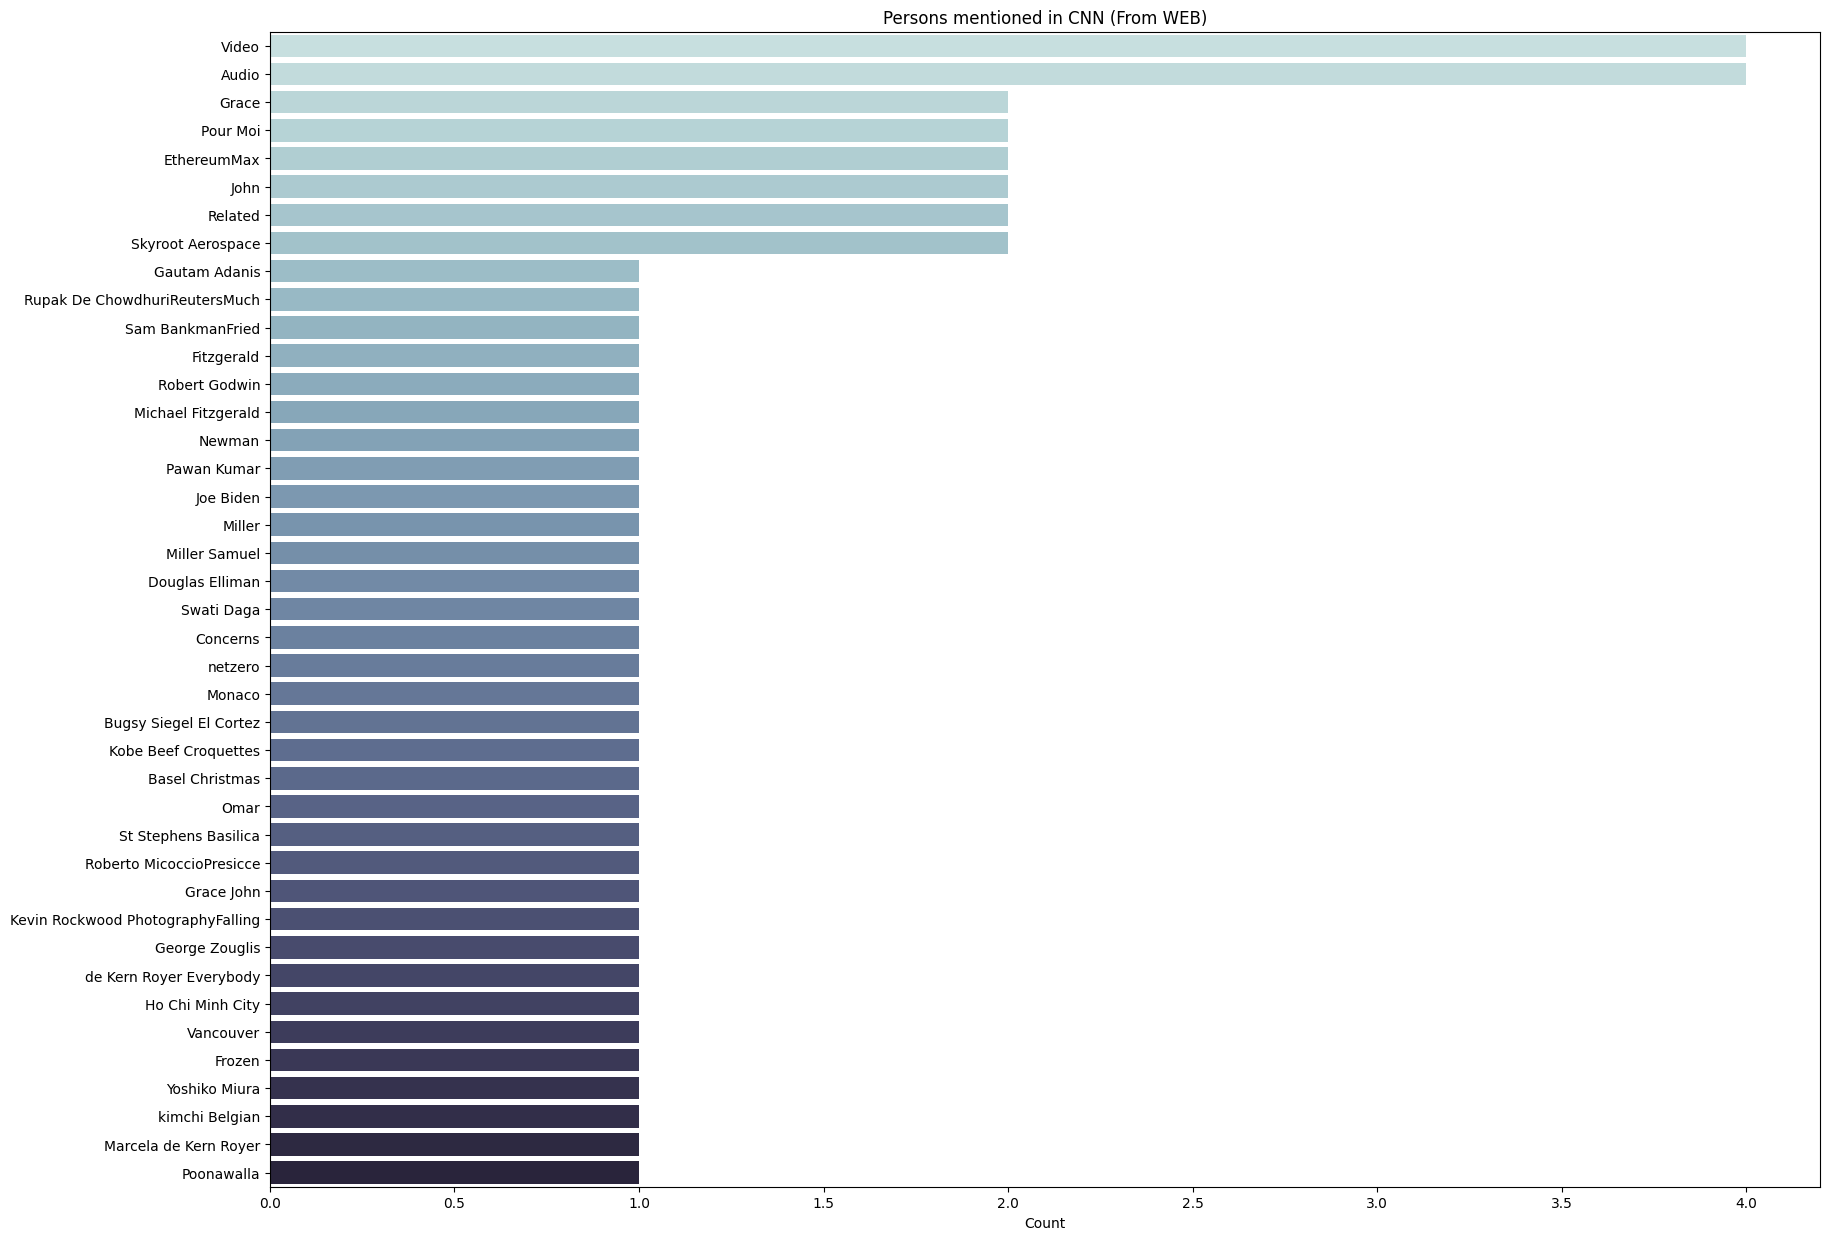

In [142]:
plt.figure(figsize=(20,15))
sns.barplot(x=dfCNNWebPersonCount.values,y=dfCNNWebPersonCount.index,palette="ch:start=.2,rot=-.3")
plt.title("Persons mentioned in CNN (From WEB)")
plt.xlabel("Count")
plt.show()

In [143]:
dfSkyNewsWebCount,dfSkyNewsPersonCount  = returnData(dfSkyNewsWeb)

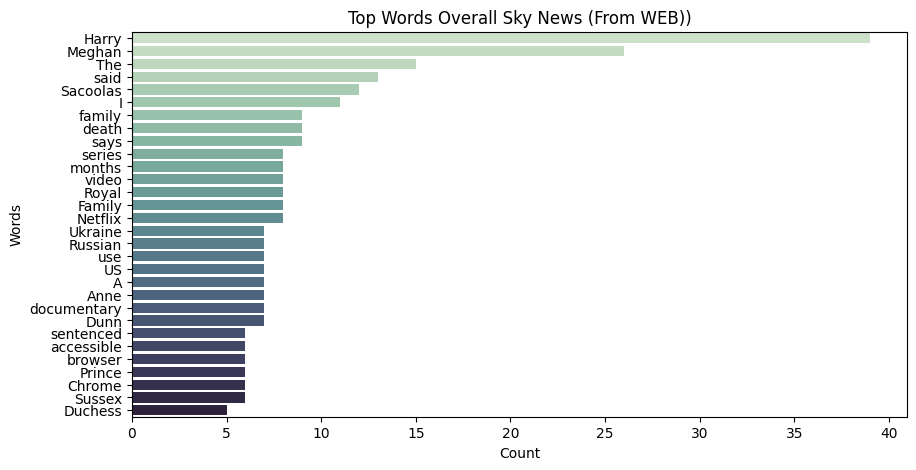

In [144]:
dfSkyNewsWebCount = dfSkyNewsWebCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfSkyNewsWebCount.values,y=dfSkyNewsWebCount.index,palette="ch:start=.4,rot=-.6")
plt.title('Top Words Overall Sky News (From WEB))')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

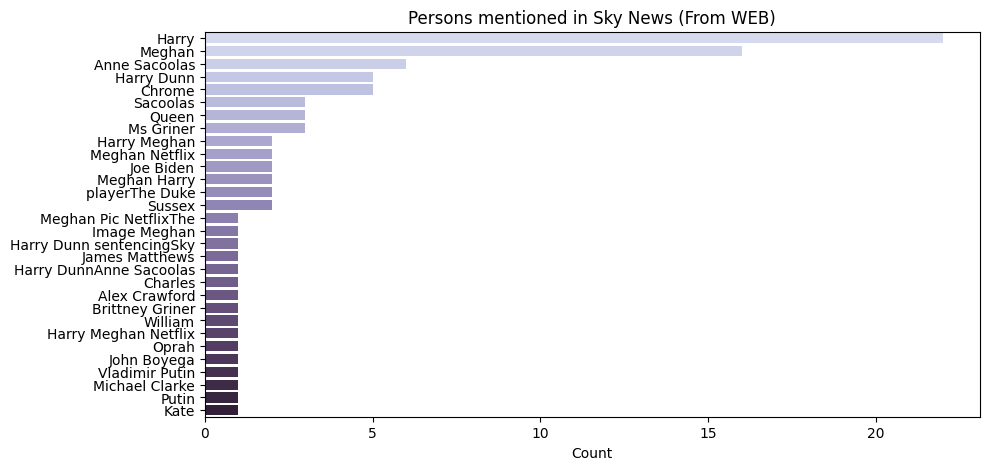

In [145]:
dfSkyNewsPersonCount = dfSkyNewsPersonCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfSkyNewsPersonCount.values,y=dfSkyNewsPersonCount.index,palette="ch:start=.4,rot=-.2")
plt.title("Persons mentioned in Sky News (From WEB)")
plt.xlabel("Count")
plt.show()

In [146]:
dfBBCWEBCount,dfBBCWEBPersonCount  = returnData(dfBBCWEB)

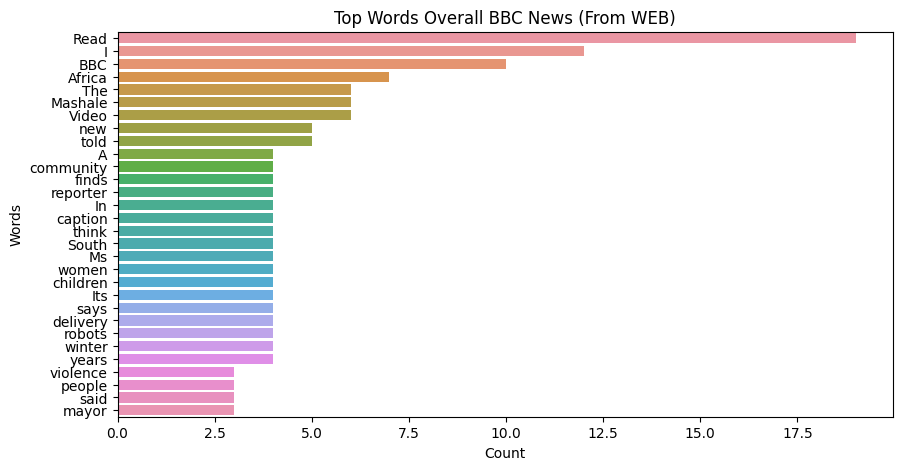

In [147]:
dfBBCWEBCount = dfBBCWEBCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfBBCWEBCount.values,y=dfBBCWEBCount.index)
plt.title('Top Words Overall BBC News (From WEB)')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

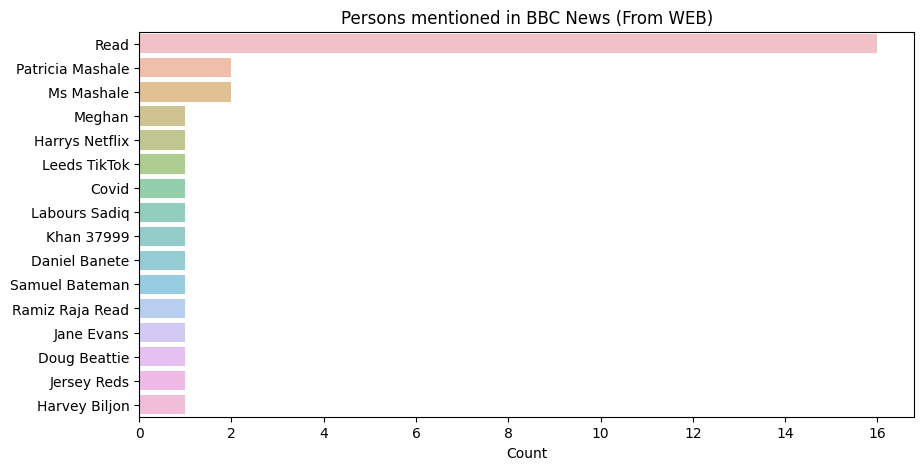

In [148]:
dfBBCWEBPersonCount = dfBBCWEBPersonCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfBBCWEBPersonCount.values,y=dfBBCWEBPersonCount.index,alpha=0.6)
plt.title("Persons mentioned in BBC News (From WEB)")
plt.xlabel("Count")
plt.show()

## Twitter data analysis

In [149]:
# loading csv file

dfFoxNewTwit = pd.read_csv('FoxNews.csv')

dfSkyNewTwit = pd.read_csv('SkyNews.csv')

dfCNNNewTwit = pd.read_csv('CNN.csv')

dfBBCNewTwit = pd.read_csv('BBCWorld.csv')

In [150]:
def polarityListTwit(df):
        """Polarity function for twitter data"""
        polarity = []
        for summary in df['Tweet Text']:
                blob = TextBlob(summary)
                sentiment = blob.sentiment.polarity
                polarity.append(sentiment)
        return polarity

In [151]:
# getting polarity

FoxNewTwitPolarity = polarityListTwit(dfFoxNewTwit)

SkyNewTwitPolarity = polarityListTwit(dfSkyNewTwit)

CNNTwitPolarity = polarityListTwit(dfCNNNewTwit)

BBCNewTwitPolarity = polarityListTwit(dfBBCNewTwit)

In [152]:
# making dataframe

FoxNewsTwitDf = pd.DataFrame({'Summary Text': dfFoxNewTwit['Tweet Text'],'Polarity':FoxNewTwitPolarity})

SkyNewTwitDf = pd.DataFrame({'Summary Text': dfSkyNewTwit['Tweet Text'],'Polarity':SkyNewTwitPolarity})

CNNNewTwitDf = pd.DataFrame({'Summary Text': dfCNNNewTwit['Tweet Text'],'Polarity':CNNTwitPolarity})

BBCNewTwitDf = pd.DataFrame({'Summary Text': dfBBCNewTwit['Tweet Text'],'Polarity':BBCNewTwitPolarity})

In [153]:
# saving to csv file

FoxNewsTwitDf.to_csv('FoxNewsTwit.csv')
SkyNewTwitDf.to_csv('SkyNewTwit.csv')
CNNNewTwitDf.to_csv('CNNNewTwit.csv')
BBCNewTwitDf.to_csv('BBCNewTwit.csv')

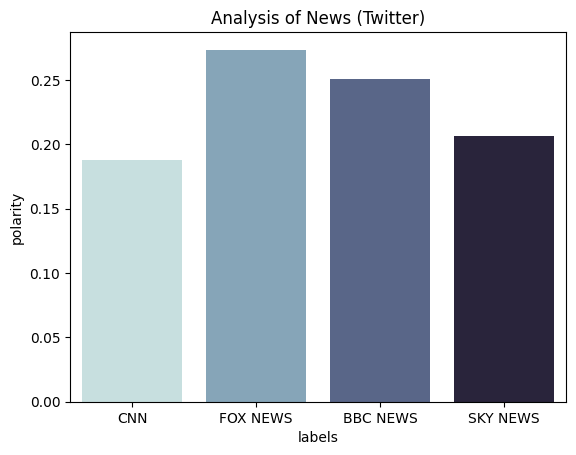

In [154]:
# Bar graph (Positive values)

y0 = pd.read_csv('CNNNewTwit.csv',index_col=0)
y1 = pd.read_csv('FoxNewsTwit.csv',index_col=0)
y2 = pd.read_csv('BBCNewTwit.csv',index_col=0)
y3 = pd.read_csv('SkyNewTwit.csv',index_col=0)

y0 = getValues(1,y0)

y1 = getValues(1,y1)

y2 = getValues(1,y2)

y3 = getValues(1,y3)

plt.title("Analysis of News (Twitter)")

x = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]


y = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]

pltdf = pd.DataFrame({'labels':x,'polarity':y})


sns.barplot(x=pltdf.labels,y=pltdf.polarity,palette="ch:start=.2,rot=-.3")

plt.show()

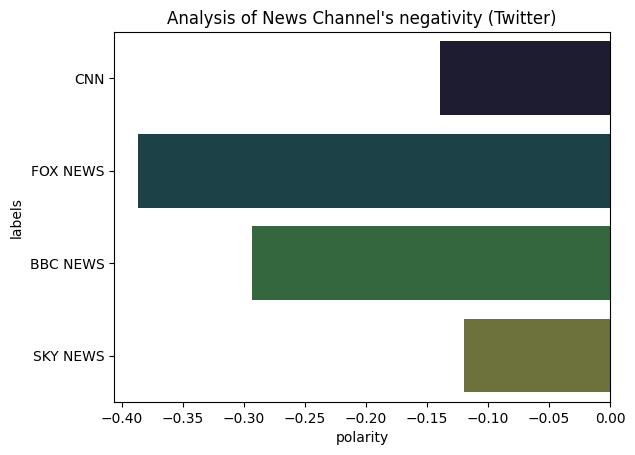

In [155]:
# Bar graph (Negative values)

y0 = pd.read_csv('CNNNewTwit.csv',index_col=0)
y1 = pd.read_csv('FoxNewsTwit.csv',index_col=0)
y2 = pd.read_csv('BBCNewTwit.csv',index_col=0)
y3 = pd.read_csv('SkyNewTwit.csv',index_col=0)

y0 = getValues(-1,y0)

y1 = getValues(-1,y1)

y2 = getValues(-1,y2)

y3 = getValues(-1,y3)

plt.title("Analysis of News Channel's negativity (Twitter)")

x = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]


y = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]

pltdf = pd.DataFrame({'labels':x,'polarity':y})


sns.barplot(y=pltdf.labels,x=pltdf.polarity,palette=sns.color_palette("cubehelix", 8))

plt.show()

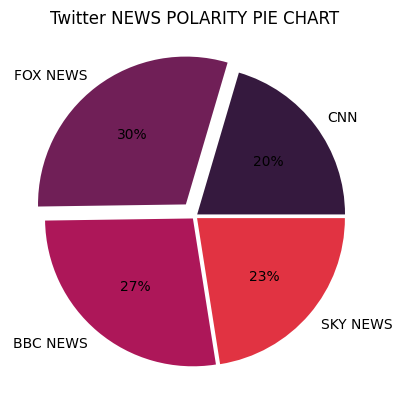

In [156]:
#  TODO: Pie Chart

y0 = pd.read_csv('CNNNewTwit.csv',index_col=0)
y1 = pd.read_csv('FoxNewsTwit.csv',index_col=0)
y2 = pd.read_csv('BBCNewTwit.csv',index_col=0)
y3 = pd.read_csv('SkyNewTwit.csv',index_col=0)

y0 = getValues(1,y0)

y1 = getValues(1,y1)

y2 = getValues(1,y2)

y3 = getValues(1,y3)

plt.title("Twitter NEWS POLARITY PIE CHART")

data = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]
labels = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]
explode = [0.02,0.1,0.02,0.02]
colors = sns.color_palette("rocket")
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

## Word Disection

In [157]:
dfFoxNewsWebWordCount,dfFoxNewsWebPersonCount  = returnData(FoxNewsTwitDf)

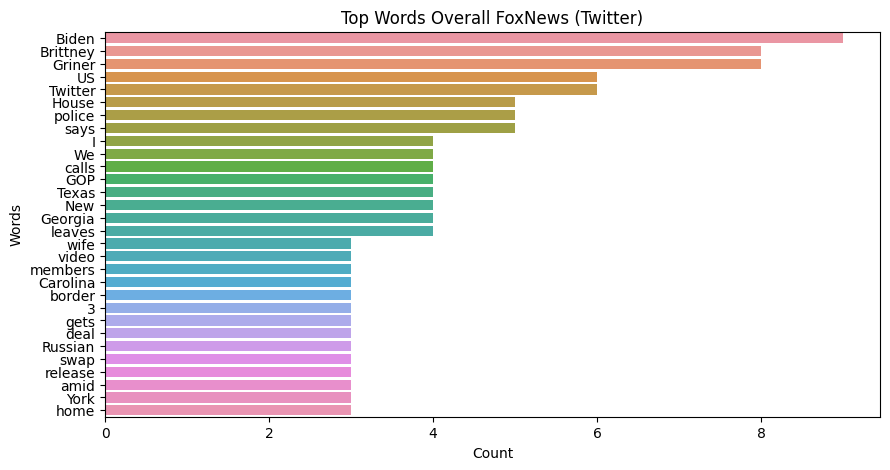

In [158]:
dfFoxNewsWebWordCount = dfFoxNewsWebWordCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfFoxNewsWebWordCount.values,y=dfFoxNewsWebWordCount.index)
plt.title('Top Words Overall FoxNews (Twitter)')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

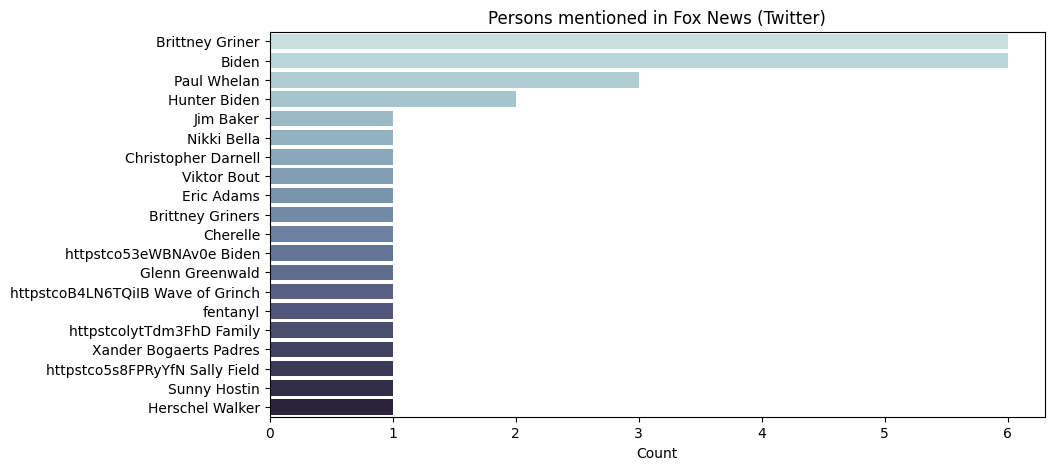

In [159]:
dfFoxNewsWebPersonCount = dfFoxNewsWebPersonCount[:20]

plt.figure(figsize=(10,5))
sns.barplot(x=dfFoxNewsWebPersonCount.values,y=dfFoxNewsWebPersonCount.index,palette="ch:start=.2,rot=-.3")
plt.title("Persons mentioned in Fox News (Twitter)")
plt.xlabel("Count")
plt.show()

In [160]:
dfCNNWebCount,dfCNNWebPersonCount  = returnData(CNNNewTwitDf)

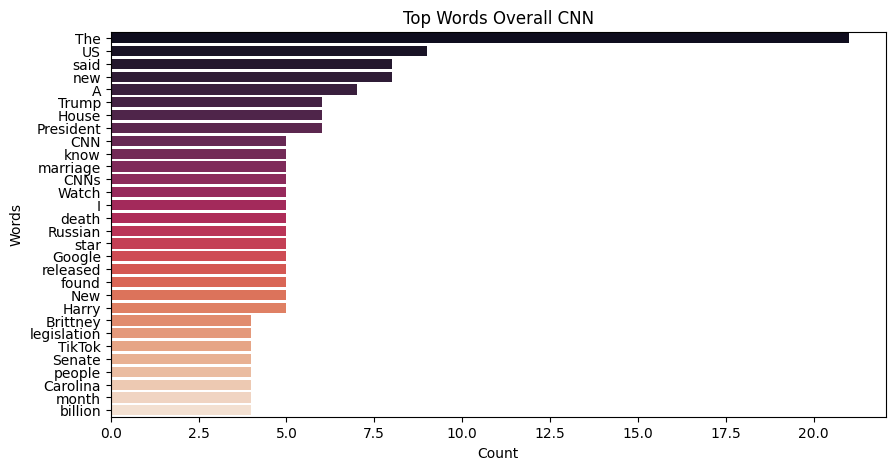

In [161]:
dfCNNWebCount = dfCNNWebCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfCNNWebCount.values,y=dfCNNWebCount.index,palette="rocket")
plt.title('Top Words Overall CNN')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

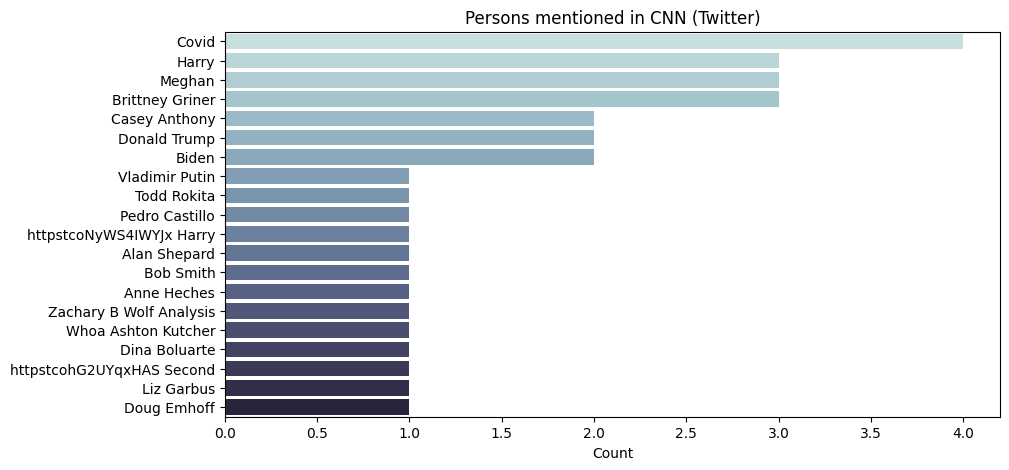

In [162]:
dfCNNWebPersonCount = dfCNNWebPersonCount[:20]

plt.figure(figsize=(10,5))
sns.barplot(x=dfCNNWebPersonCount.values,y=dfCNNWebPersonCount.index,palette="ch:start=.2,rot=-.3")
plt.title("Persons mentioned in CNN (Twitter)")
plt.xlabel("Count")
plt.show()

In [163]:
dfSkyNewsWebCount,dfSkyNewsPersonCount  = returnData(SkyNewTwitDf)

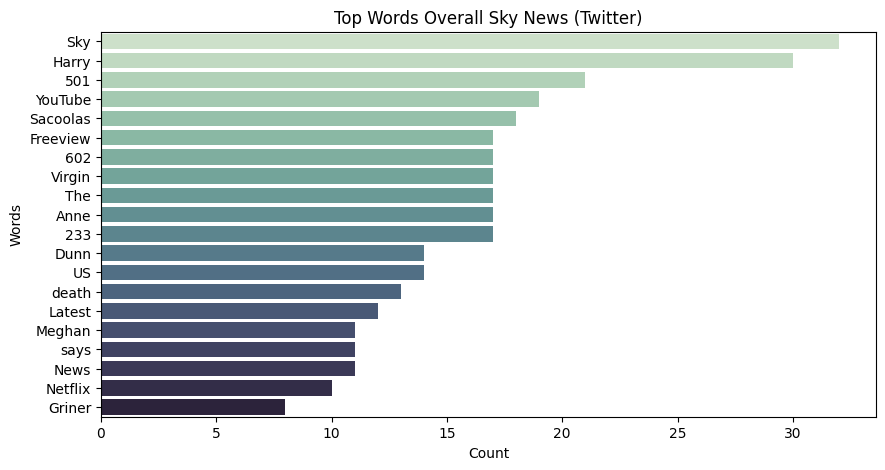

In [164]:
dfSkyNewsWebCount = dfSkyNewsWebCount[:20]
plt.figure(figsize=(10,5))
sns.barplot(x=dfSkyNewsWebCount.values,y=dfSkyNewsWebCount.index,palette="ch:start=.4,rot=-.6")
plt.title('Top Words Overall Sky News (Twitter)')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

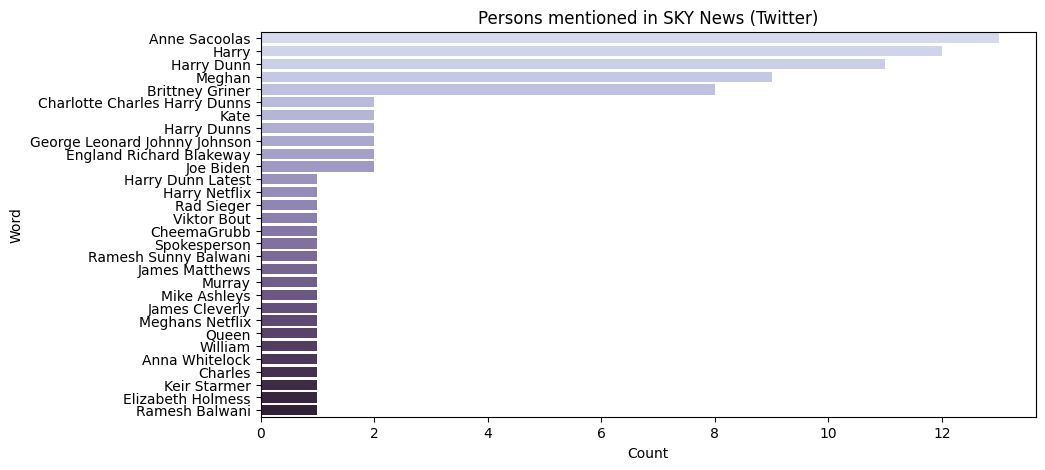

In [165]:
dfSkyNewsPersonCount = dfSkyNewsPersonCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfSkyNewsPersonCount.values,y=dfSkyNewsPersonCount.index,palette="ch:start=.4,rot=-.2")
plt.title("Persons mentioned in SKY News (Twitter)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [166]:
dfBBCWEBCount,dfBBCWEBPersonCount  = returnData(BBCNewTwitDf)

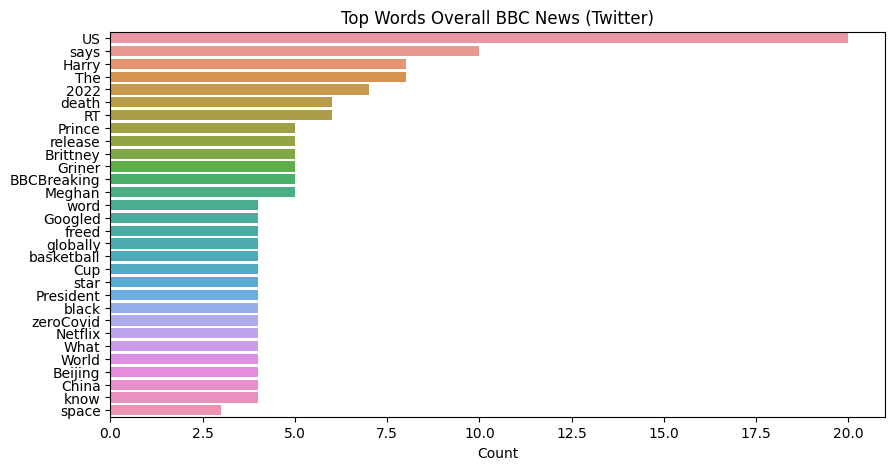

In [167]:
dfBBCWEBCount = dfBBCWEBCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfBBCWEBCount.values,y=dfBBCWEBCount.index)
plt.title('Top Words Overall BBC News (Twitter)')
plt.xlabel("Count")
plt.show()

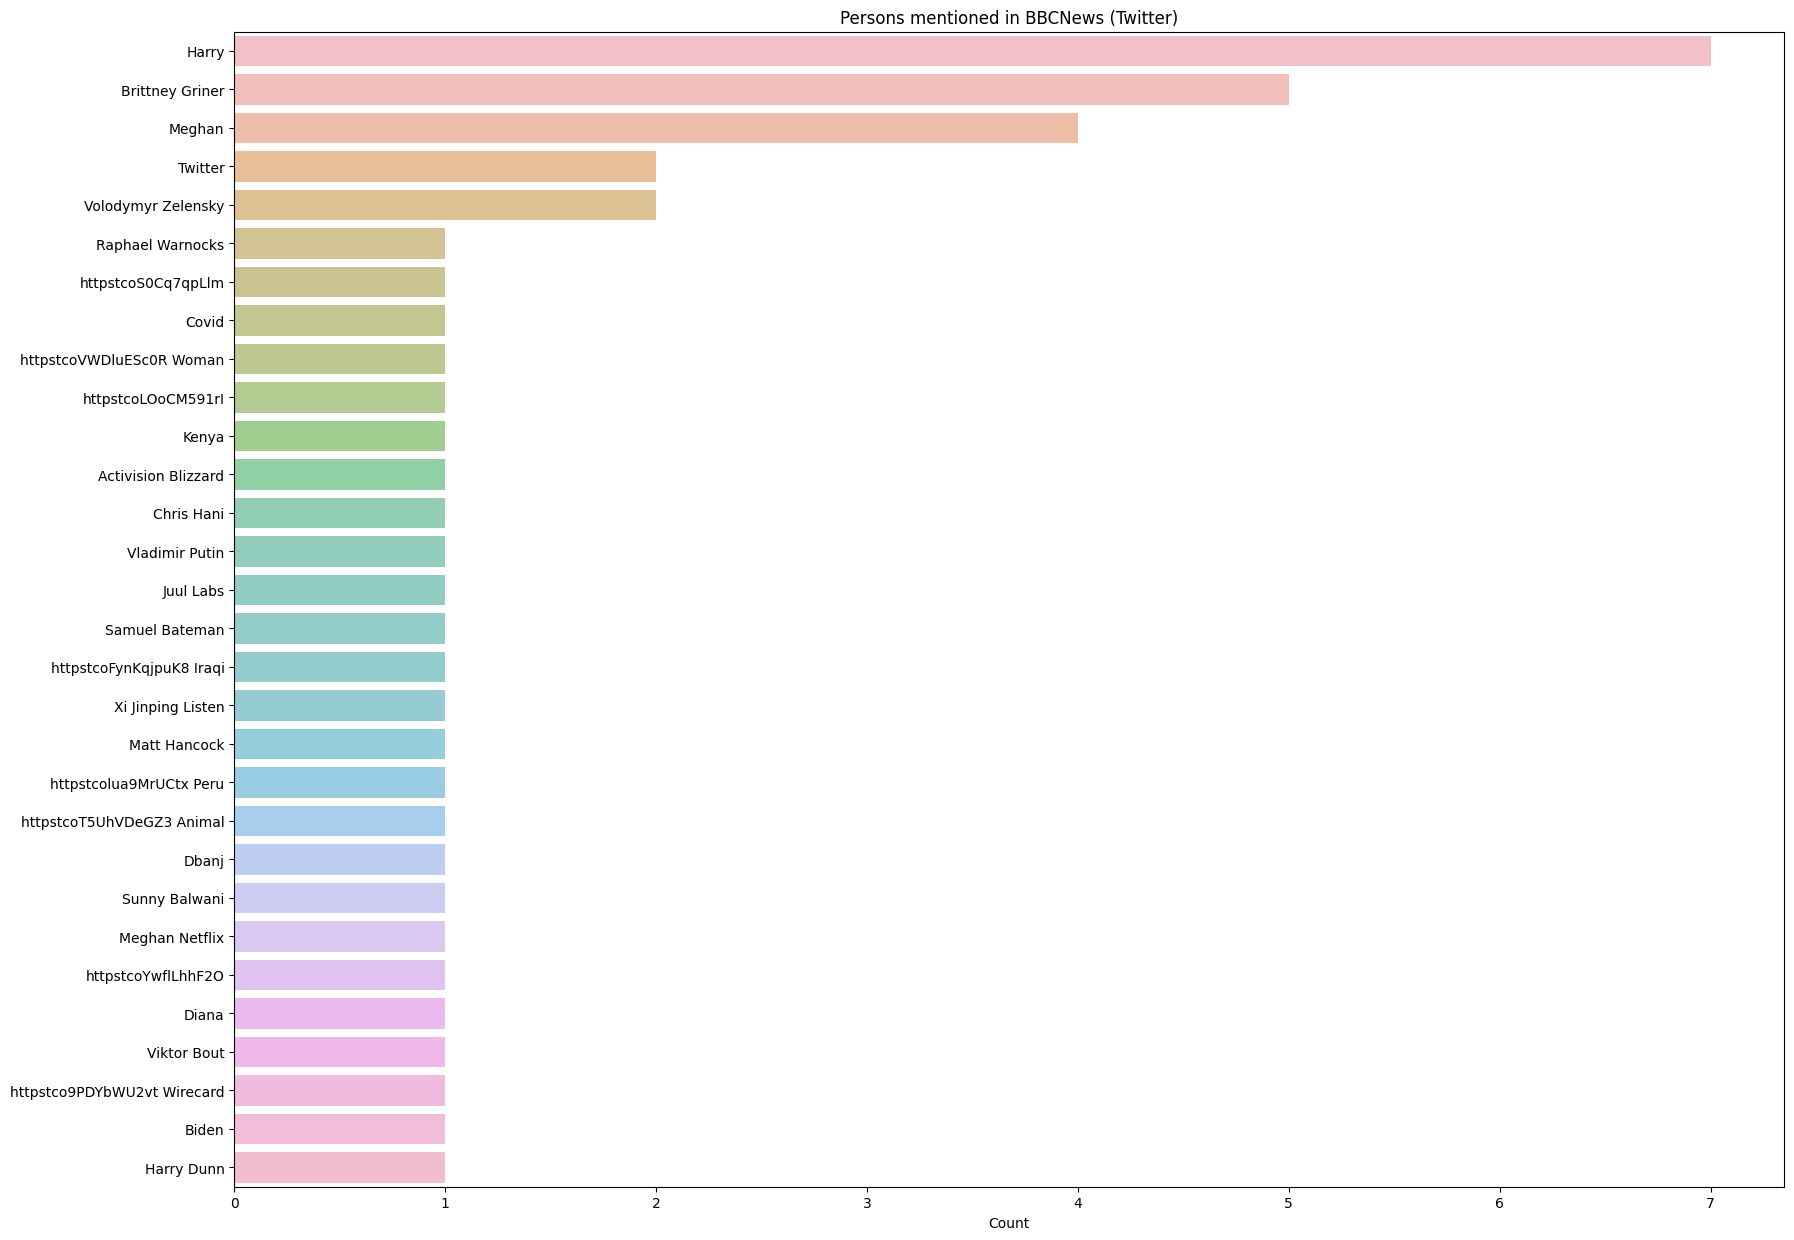

In [170]:
dfBBCWEBPersonCount = dfBBCWEBPersonCount[:30]
plt.figure(figsize=(20,15))
sns.barplot(x=dfBBCWEBPersonCount.values,y=dfBBCWEBPersonCount.index,alpha=0.6)
plt.title("Persons mentioned in BBCNews (Twitter)")
plt.xlabel("Count")
plt.show()